# Build a Language Train Model
http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

In [25]:
import sys

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics

You need to clone the scikit learn if you dont have the doc folder in sklearn folder within your installed packages. Navigate to doc/tutorials/text_analytics/data and run the fetch data in each tutorial you are working on. If running jupyter from skeletons, you would run the following after:

In [4]:
languages_data_folder = '../data/languages/paragraphs'
dataset = load_files(languages_data_folder)

#### Split the dataset in training and test set:

In [5]:
train_test_split?

In [6]:
docs_train, docs_test, y_train, y_test = train_test_split(dataset.data, 
                                                          dataset.target, 
                                                          test_size=0.5, 
                                                          random_state = 42)

In [7]:
y_train

array([ 1,  1, 10,  1,  7,  4,  2,  0,  7,  8,  9,  1,  2,  3,  5,  1,  1,
        5,  4,  1,  5,  5,  2,  3,  2,  1,  4,  4,  4,  3, 10,  1,  4,  4,
        9,  6,  4,  7,  2,  1,  1,  0,  2,  8,  2,  8,  8,  4,  2,  4,  2,
        3,  2,  1,  1,  9,  7,  1,  2,  1,  6,  2,  4,  1,  6,  4,  2,  3,
        1,  8, 10,  1, 10, 10,  3,  6,  5, 10,  8, 10,  1,  5,  6,  2,  9,
        3,  9, 10,  4, 10, 10,  3,  3,  1,  5,  5,  5,  9,  8,  2, 10,  1,
        3,  5,  6,  1,  0,  6,  2,  9, 10,  6,  2,  7,  1,  2,  4,  2,  5,
        3,  2,  0,  3,  4,  5,  9,  2,  5,  7,  9,  4, 10,  1,  2,  6,  3,
        2,  2,  0,  1,  2,  7,  9,  3, 10,  8,  3,  1,  2,  6,  1,  1,  2,
        3,  8,  2, 10,  3,  6,  3,  9, 10,  4,  1,  6,  2,  4,  3,  5,  9,
        2,  3,  1,  7,  6,  5,  3,  1,  9,  9,  7,  9,  1,  9,  2,  1,  8,
        1,  9, 10,  9,  3,  3,  2, 10, 10,  4,  6,  4, 10, 10,  3,  4,  8,
        2,  4,  6,  6,  1,  4,  1,  4,  3,  4,  5,  9,  1,  9,  2,  4,  0,
        8,  5,  3,  5,  4

In [26]:
# TASK: Build a vectorizer that splits strings into sequence of 1 to 3
# characters instead of word tokens
tfidf_vectorizer = TfidfVectorizer(analyzer = 'char_wb', ngram_range = (1,3), use_idf=False)
hashing_vectorizer = HashingVectorizer(analyzer = 'char_wb', ngram_range = (1,3))

In [27]:
# TASK: Build a vectorizer / classifier pipeline using the previous analyzer
# the pipeline instance should stored in a variable named clf
from sklearn.naive_bayes import MultinomialNB

text_clf = Pipeline([
                    ('vec', tfidf_vectorizer),
                    ('clf', Perceptron()),
                    ])

text_clf_h = Pipeline([
                    ('vec', hashing_vectorizer),
                    ('clf', Perceptron()),
                    ])

text_clf_MNB = Pipeline([
                    ('vec', tfidf_vectorizer),
                    ('clf_MNB', MultinomialNB()),
                    ])

In [29]:
# TASK: Fit the pipeline on the training set
clf = text_clf.fit(docs_train, y_train)
clf_MNB = text_clf_MNB.fit(docs_train, y_train)
clf_h = text_clf_h.fit(docs_train, y_train)

In [30]:
# TASK: Predict the outcome on the testing set in a variable named y_predicted
y_predicted = text_clf.predict(docs_test)
y_predicted_h = text_clf_h.predict(docs_test)
y_predicted_MNB = text_clf_MNB.predict(docs_test)

In [12]:
# Print the classification report
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

             precision    recall  f1-score   support

         ar       0.93      1.00      0.96        13
         de       1.00      1.00      1.00        74
         en       0.97      1.00      0.99        75
         es       1.00      0.97      0.98        62
         fr       1.00      1.00      1.00        65
         it       1.00      0.98      0.99        45
         ja       1.00      1.00      1.00        35
         nl       1.00      1.00      1.00        26
         pl       0.95      1.00      0.98        21
         pt       0.98      0.96      0.97        48
         ru       1.00      1.00      1.00        26

avg / total       0.99      0.99      0.99       490



In [31]:
# Print the classification report
print(metrics.classification_report(y_test, y_predicted_h,
                                    target_names=dataset.target_names))

             precision    recall  f1-score   support

         ar       0.93      1.00      0.96        13
         de       1.00      1.00      1.00        74
         en       0.97      1.00      0.99        75
         es       1.00      0.97      0.98        62
         fr       1.00      0.98      0.99        65
         it       0.98      0.98      0.98        45
         ja       1.00      1.00      1.00        35
         nl       1.00      1.00      1.00        26
         pl       0.95      1.00      0.98        21
         pt       0.98      0.96      0.97        48
         ru       1.00      1.00      1.00        26

avg / total       0.99      0.99      0.99       490



In [13]:
print(metrics.classification_report(y_test, y_predicted_MNB,
                                    target_names=dataset.target_names))

             precision    recall  f1-score   support

         ar       0.00      0.00      0.00        13
         de       0.22      1.00      0.37        74
         en       0.76      1.00      0.86        75
         es       0.00      0.00      0.00        62
         fr       1.00      0.02      0.03        65
         it       0.00      0.00      0.00        45
         ja       1.00      0.97      0.99        35
         nl       0.00      0.00      0.00        26
         pl       0.00      0.00      0.00        21
         pt       0.00      0.00      0.00        48
         ru       1.00      0.96      0.98        26

avg / total       0.41      0.43      0.31       490



/Users/races/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
# Plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

[[13  0  0  0  0  0  0  0  0  0  0]
 [ 0 74  0  0  0  0  0  0  0  0  0]
 [ 0  0 75  0  0  0  0  0  0  0  0]
 [ 0  0  1 60  0  0  0  0  0  1  0]
 [ 0  0  0  0 65  0  0  0  0  0  0]
 [ 0  0  1  0  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0  0]
 [ 0  0  0  0  0  0  0 26  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0]
 [ 1  0  0  0  0  0  0  0  1 46  0]
 [ 0  0  0  0  0  0  0  0  0  0 26]]


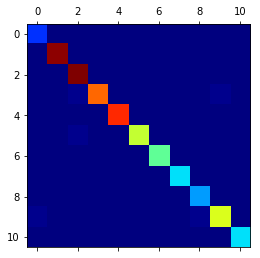

In [15]:
import matplotlib.pyplot as plt
plt.matshow(cm, cmap=plt.cm.jet)
plt.show()

In [21]:
# Predict the result on some short new sentences:
sentences = [
    u'This is a language detection test.',
    u'Ceci est un test de d\xe9tection de la langue.',
    u'Dies ist ein Test, um die Sprache zu erkennen.',
]
predicted = clf.predict(sentences)

for s, p in zip(sentences, predicted):
    print(u'The language of "%s" is "%s"' % (s, dataset.target_names[p]))

The language of "This is a language detection test." is "en"
The language of "Ceci est un test de détection de la langue." is "fr"
The language of "Dies ist ein Test, um die Sprache zu erkennen." is "de"


In [22]:
clf.decision_function(sentences)

array([[-0.17890027, -0.19942126,  0.25111606, -0.80110686, -0.19411918,
        -1.04400761, -0.28990774, -0.74829956, -0.59437924, -1.28452954,
        -0.3098033 ],
       [-0.16662951, -0.5005147 , -0.79412449, -0.15032453,  0.4370057 ,
        -0.81009121, -0.31489957, -0.5713718 , -0.60959872, -1.37222979,
        -0.26185934],
       [-0.18896853,  0.25061685, -0.81917083, -1.05646783, -0.18884781,
        -1.3669948 , -0.30153788, -0.71351789, -0.50437212, -1.22134267,
        -0.27343279]])

In [23]:
dataset.target_names

['ar', 'de', 'en', 'es', 'fr', 'it', 'ja', 'nl', 'pl', 'pt', 'ru']